## March

### Constructing a co-occurence network of hashtags from March

In [1]:
import os
import json
import nltk
from nltk.tokenize import TweetTokenizer
from collections import Counter

In [2]:
hashtags = []
tweet_tokenizer = TweetTokenizer()

path = 'results_03_extended'
for f in os.listdir(f'{path}'):
    if f.startswith('batch'):
        inF = open(f'{path}/{f}','r')
        data = json.load(inF)
        inF.close()
        for batch in data:
            for tweet in batch['tweets']:
                if tweet['isRetweet']==False:
                    text = tweet['text']
                    tokens = tweet_tokenizer.tokenize(text.lower())
                    for w in tokens:
                        if w.startswith('#'):
                            hashtags.append(w)


print(len(set(hashtags))) #total number of hashtags

47475


In [4]:
hash_c = Counter(hashtags).most_common(25)
popular_hash = [h[0] for h in hash_c]
hash_c

[('#ukraine', 31760),
 ('#russia', 13727),
 ('#putin', 10113),
 ('#standwithukraine', 6398),
 ('#ukrainerussiawar', 4801),
 ('#nato', 3926),
 ('#ukrainewar', 3394),
 ('#stopputin', 3338),
 ('#stoprussia', 3228),
 ('#ukraine️', 2941),
 ('#russian', 2564),
 ('#ukrainerussianwar', 2537),
 ('#russianukrainianwar', 2491),
 ('#kyiv', 2269),
 ('#zelensky', 2191),
 ('#stopputinnow', 2187),
 ('#slavaukraini', 2034),
 ('#nft', 1999),
 ('#russiaukrainewar', 1823),
 ('#ukrainian', 1822),
 ('#usa', 1745),
 ('#war', 1692),
 ('#putinwarcriminal', 1687),
 ('#ukraineunderattack', 1558),
 ('#bitcoin', 1491)]

In [6]:
print(popular_hash)

['#ukraine', '#russia', '#putin', '#standwithukraine', '#ukrainerussiawar', '#nato', '#ukrainewar', '#stopputin', '#stoprussia', '#ukraine️', '#russian', '#ukrainerussianwar', '#russianukrainianwar', '#kyiv', '#zelensky', '#stopputinnow', '#slavaukraini', '#nft', '#russiaukrainewar', '#ukrainian', '#usa', '#war', '#putinwarcriminal', '#ukraineunderattack', '#bitcoin']


In [7]:
u_hashtags = set(hashtags)
len(u_hashtags)

47475

In [8]:
tweet_hash = {}

for f in os.listdir(f'{path}'):
    inF = open(f'{path}/{f}','r')
    data = json.load(inF)
    inF.close()
    for batch in data:
        for tweet in batch['tweets']:
            if tweet['isRetweet']==False:
                text = tweet['text']
                tokens = tweet_tokenizer.tokenize(text.lower())
                tweetHash = []
                for w in tokens:
                    if w.startswith('#'):
                        tweetHash.append(w)
                            
                tweet_hash[tweet['id']] = tweetHash

In [15]:
for key in list(tweet_hash.keys())[:5]:
    print(key, tweet_hash[key])

1506636909660893185 []
1506636910717980673 []
1506636910470602758 ['#foxnews', '#funny']
1506636911103946753 []
1506636910919307273 []


In [9]:
from collections import defaultdict
import numpy as np

In [14]:
#popular_hash.remove('#')
matrix = {}

for h in popular_hash:
    matrix[h] = list(np.zeros(len(popular_hash), dtype=int))

In [16]:
for h1 in popular_hash:
    for key in tweet_hash:
        hashs = tweet_hash[key]
        if len(hashs) > 1:
            if h1 in hashs:
                for i in range(len(popular_hash)):
                    h2 = popular_hash[i]
                    if h1 == h2:
                        matrix[h1][i] = 0
                    elif h2 in hashs:
                        matrix[h1][i] += 1

In [17]:
print(matrix)

{'#ukraine': [0, 6683, 2588, 1742, 2321, 1361, 1944, 1171, 1235, 75, 1378, 1341, 1062, 1417, 750, 507, 255, 567, 752, 662, 854, 1121, 465, 828, 228], '#russia': [6683, 0, 2345, 579, 1171, 887, 818, 220, 214, 458, 741, 567, 687, 638, 297, 168, 109, 161, 650, 349, 706, 834, 236, 398, 409], '#putin': [2588, 2345, 0, 517, 559, 619, 347, 588, 243, 221, 510, 284, 422, 281, 384, 150, 118, 98, 316, 107, 339, 326, 289, 221, 207], '#standwithukraine': [1742, 579, 517, 0, 258, 139, 121, 386, 516, 112, 72, 210, 75, 280, 90, 446, 320, 151, 127, 69, 42, 84, 200, 167, 176], '#ukrainerussiawar': [2321, 1171, 559, 258, 0, 353, 768, 142, 161, 287, 363, 269, 438, 336, 160, 93, 73, 37, 411, 145, 112, 166, 144, 486, 17], '#nato': [1361, 887, 619, 139, 353, 0, 208, 117, 79, 106, 201, 135, 148, 185, 219, 76, 44, 30, 209, 46, 442, 170, 47, 96, 26], '#ukrainewar': [1944, 818, 347, 121, 768, 208, 0, 139, 135, 252, 266, 385, 397, 268, 89, 64, 41, 139, 272, 261, 92, 179, 69, 404, 13], '#stopputin': [1171, 220, 58

In [18]:
import matplotlib.pyplot as plt
import networkx as nx

In [19]:
G = nx.Graph()

for h in popular_hash: 
    G.add_nodes_from([(h)])
    
for h in matrix:
    edges = matrix[h]
    for i in range(len(edges)):
        if edges[i] != 0:
            G.add_weighted_edges_from([(h,popular_hash[i],edges[i])])

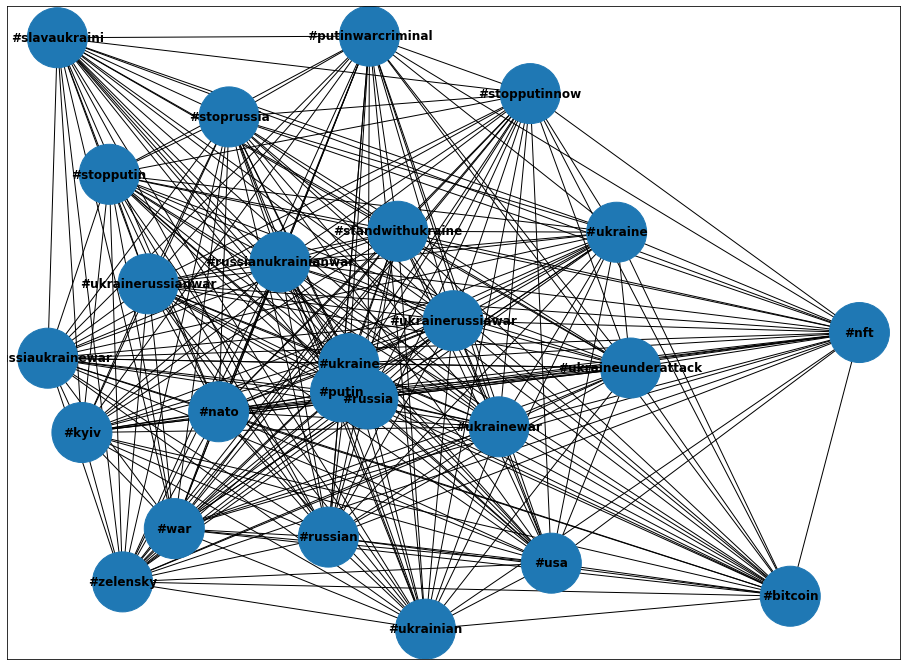

In [20]:
plt.figure(figsize=(16,12))# change size of matlab drawing area

options = {'with_labels': True,
          'font_color': 'black', 'font_weight': 'bold'}

edges = G.edges()
d = dict(G.degree)
#colors = [len(G[u][v]['courses']) for u,v in edges]
#weights = [G[u][v]['weight'] for u,v in edges]

nx.draw_networkx(G,node_size = [v * 150 for v in d.values()], **options)

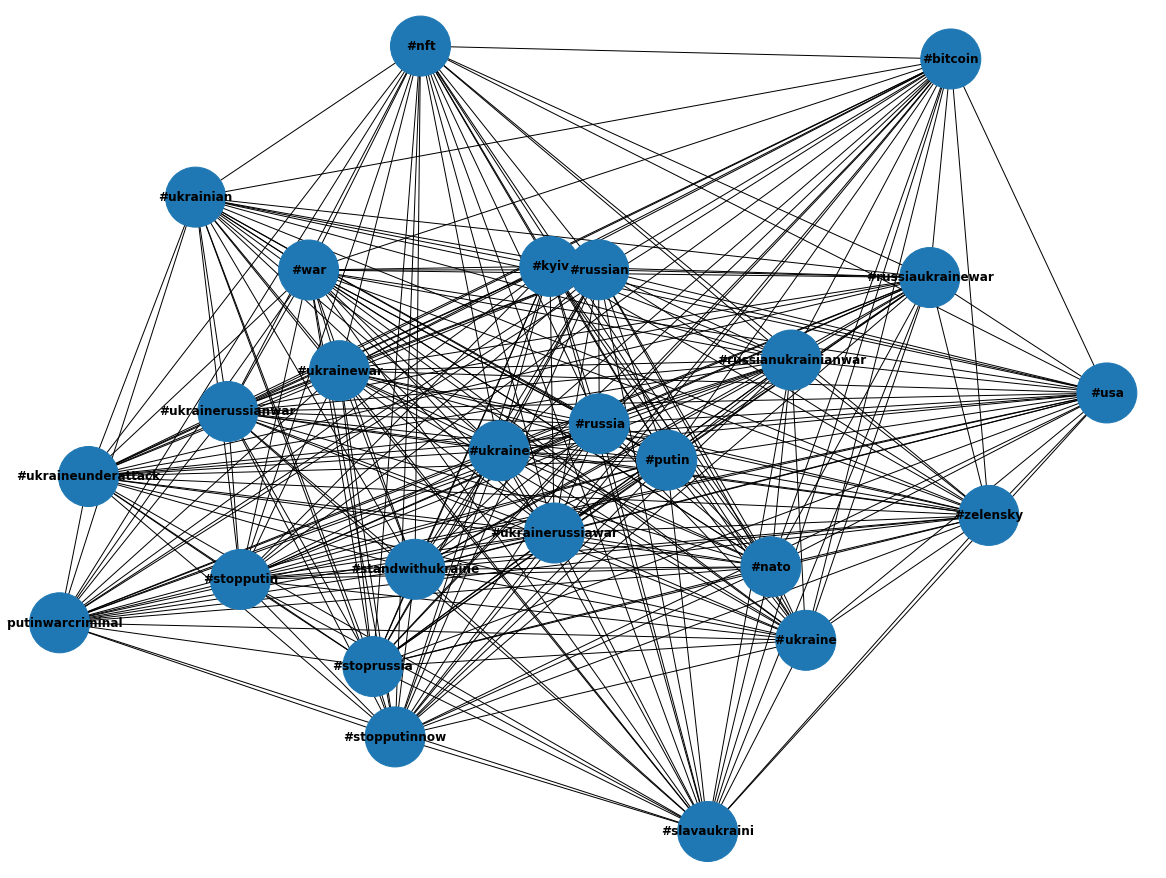

In [21]:
plt.figure(figsize=(16,12))
nx.draw_spring(G, node_size = [v * 150 for v in d.values()],**options)

## 22 February

### Constructing a co-occurence network of hashtags from 22 February

In [59]:
files2 = os.listdir('results_02')
len(files2)

31

In [61]:
hashtags = []
tweet_tokenizer = TweetTokenizer()

for f in files2:
    if f.startswith('batch'):
        inF = open(f'results_02/{f}','r')
        data = json.load(inF)
        inF.close()
        for batch in data:
            for tweet in batch['tweets']:
                if tweet['isRetweet']==False:
                    text = tweet['text']
                    tokens = tweet_tokenizer.tokenize(text.lower())
                    for w in tokens:
                        if w.startswith('#'):
                            hashtags.append(w)

print(len(set(hashtags))) #total number of hashtags

14087


In [63]:
hash_c = Counter(hashtags).most_common(25)
hash_c

[('#ukraine', 7758),
 ('#putin', 4007),
 ('#russia', 3961),
 ('#ukrainerussiacrisis', 1497),
 ('#russiaukrainecrisis', 1186),
 ('#nato', 1117),
 ('#ukraineconflict', 833),
 ('#ukrainecrisis', 822),
 ('#donetsk', 752),
 ('#biden', 734),
 ('#donbass', 697),
 ('#russiaucraina', 524),
 ('#standwithukraine', 507),
 ('#usa', 438),
 ('#news', 432),
 ('#johnsonout29', 425),
 ('#russian', 419),
 ('#bitcoin', 415),
 ('#russland', 384),
 ('#putinswar', 374),
 ('#luhansk', 362),
 ('#eu', 328),
 ('#poutine', 318),
 ('#nordstream2', 308),
 ('#ukraina', 303)]

In [64]:
popular_hash = [h[0] for h in hash_c]
print(popular_hash)

['#ukraine', '#putin', '#russia', '#ukrainerussiacrisis', '#russiaukrainecrisis', '#nato', '#ukraineconflict', '#ukrainecrisis', '#donetsk', '#biden', '#donbass', '#russiaucraina', '#standwithukraine', '#usa', '#news', '#johnsonout29', '#russian', '#bitcoin', '#russland', '#putinswar', '#luhansk', '#eu', '#poutine', '#nordstream2', '#ukraina']


In [65]:
unique_hashtags = set(hashtags)

In [66]:
tweet_hash = {}
path = 'results_02'

for f in files2:
    inF = open(f'{path}/{f}','r')
    data = json.load(inF)
    inF.close()
    for batch in data:
        for tweet in batch['tweets']:
            if tweet['isRetweet']==False:
                text = tweet['text']
                tokens = tweet_tokenizer.tokenize(text.lower())
                tweetHash = []
                for w in tokens:
                    if w.startswith('#'):
                        tweetHash.append(w)
                            
                tweet_hash[tweet['id']] = tweetHash

In [67]:
matrix = {}

for h in popular_hash:
    matrix[h] = list(np.zeros(len(popular_hash), dtype=int))

for h1 in popular_hash:
    for key in tweet_hash:
        hashs = tweet_hash[key]
        if len(hashs) > 1:
            if h1 in hashs:
                for i in range(len(popular_hash)):
                    h2 = popular_hash[i]
                    if h1 == h2:
                        matrix[h1][i] = 0
                    elif h2 in hashs:
                        matrix[h1][i] += 1

In [68]:
print(matrix)

{'#ukraine': [0, 1133, 2038, 702, 440, 512, 565, 440, 266, 262, 308, 113, 86, 210, 68, 12, 239, 60, 261, 143, 180, 163, 205, 125, 91], '#putin': [1133, 0, 628, 214, 224, 227, 126, 135, 135, 275, 197, 202, 39, 84, 36, 6, 124, 28, 143, 151, 85, 70, 15, 74, 113], '#russia': [2038, 628, 0, 265, 321, 371, 239, 190, 214, 217, 242, 87, 26, 202, 79, 4, 92, 177, 7, 69, 132, 127, 32, 45, 78], '#ukrainerussiacrisis': [702, 214, 265, 0, 163, 154, 438, 171, 68, 138, 44, 54, 14, 17, 8, 6, 44, 4, 5, 74, 21, 12, 14, 18, 55], '#russiaukrainecrisis': [440, 224, 321, 163, 0, 54, 186, 113, 72, 57, 68, 94, 9, 25, 11, 3, 48, 7, 3, 69, 33, 10, 9, 10, 50], '#nato': [512, 227, 371, 154, 54, 0, 130, 56, 74, 130, 93, 23, 8, 115, 5, 0, 27, 3, 51, 31, 69, 111, 2, 24, 29], '#ukraineconflict': [565, 126, 239, 438, 186, 130, 0, 227, 36, 86, 42, 37, 11, 17, 12, 1, 45, 0, 3, 50, 26, 14, 10, 18, 61], '#ukrainecrisis': [440, 135, 190, 171, 113, 56, 227, 0, 36, 39, 26, 43, 13, 14, 9, 2, 23, 5, 4, 53, 16, 18, 31, 13, 50], 

In [70]:
import matplotlib.pyplot as plt
import networkx as nx

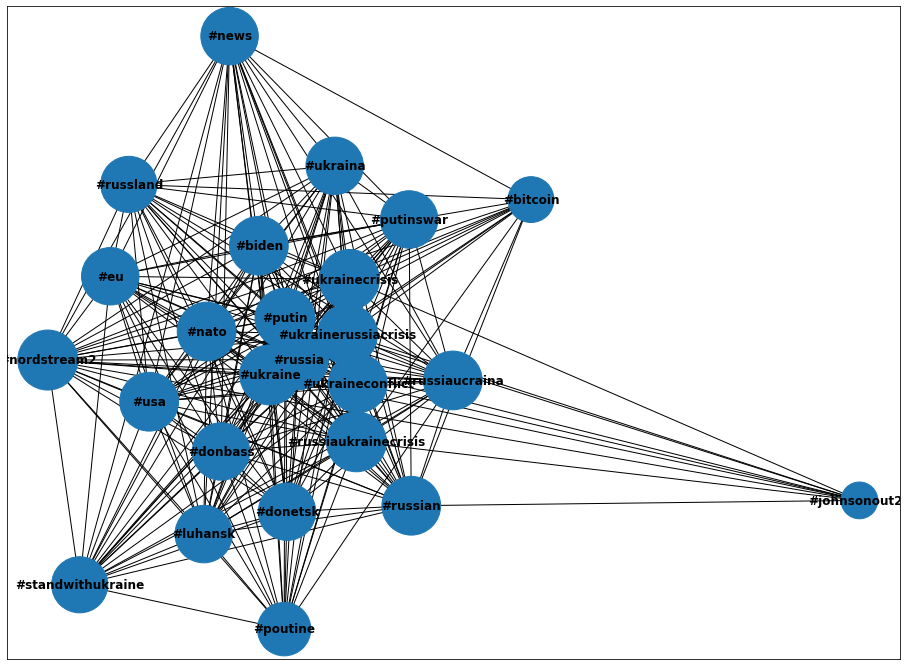

In [71]:
G = nx.Graph()

for h in popular_hash: 
    G.add_nodes_from([(h)])
    
for h in matrix:
    edges = matrix[h]
    for i in range(len(edges)):
        if edges[i] != 0:
            G.add_weighted_edges_from([(h,popular_hash[i],edges[i])])

plt.figure(figsize=(16,12))# change size of matlab drawing area

options = {'with_labels': True,
          'font_color': 'black', 'font_weight': 'bold'}

edges = G.edges()
d = dict(G.degree)
#colors = [len(G[u][v]['courses']) for u,v in edges]
#weights = [G[u][v]['weight'] for u,v in edges]

nx.draw_networkx(G,node_size = [v * 150 for v in d.values()], **options)

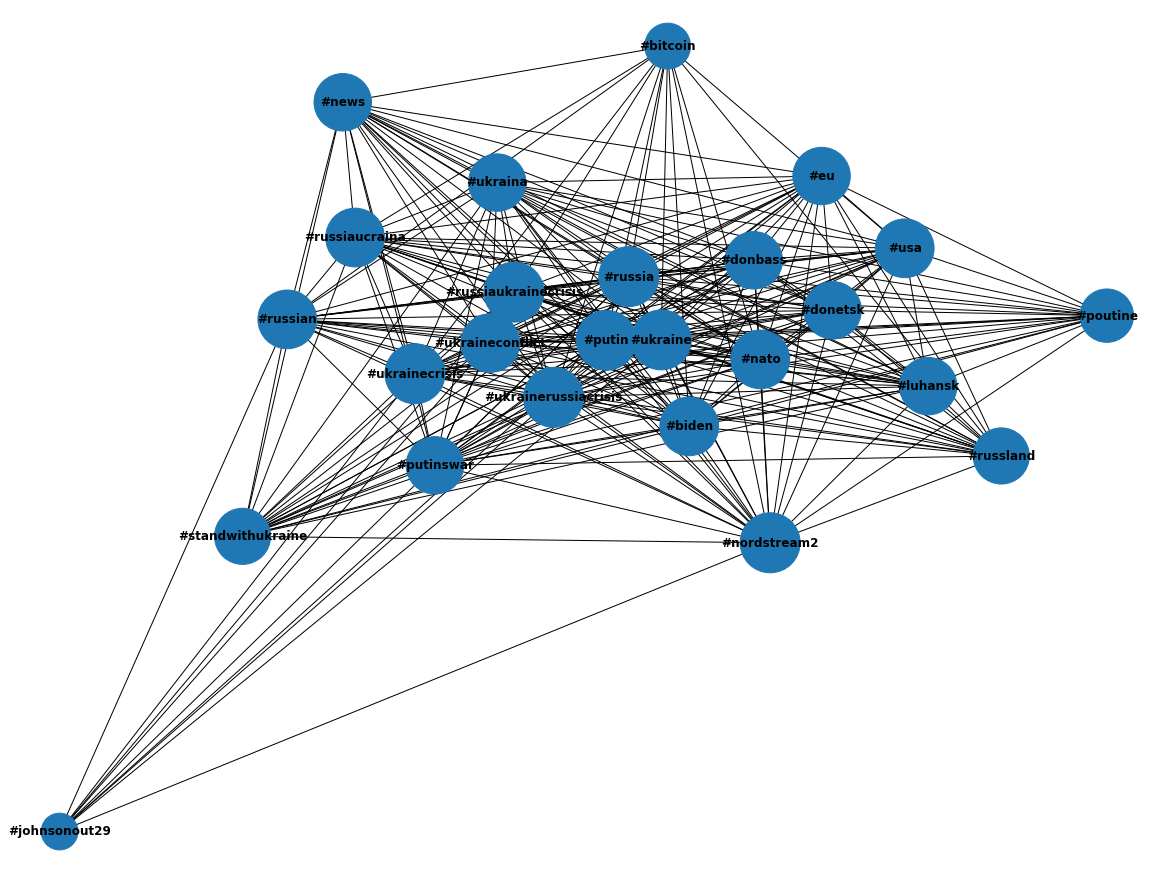

In [72]:
plt.figure(figsize=(16,12))
nx.draw_spring(G, node_size = [v * 150 for v in d.values()],**options)